In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [4]:
# [10.1]
# Read the movie100.csv, and check average length (in terms of number of words) of the
# positive and negative reviews, respectively [0.5 pt]


# Read the movie100.csv file
data = pd.read_csv('movie100.csv')

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(data)

# Calculate average length of positive and negative reviews
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

positive_lengths = positive_reviews['movie review'].apply(lambda x: len(x.split()))
negative_lengths = negative_reviews['movie review'].apply(lambda x: len(x.split()))

average_positive_length = positive_lengths.mean()
average_negative_length = negative_lengths.mean()

print("\n Average Length (in terms of number of words)")
print("\nAverage Length of Positive Reviews:", average_positive_length)
print("Average Length of Negative Reviews:", average_negative_length)



                                         movie review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
7   This show was an amazing, fresh & innovative i...  negative
8   Encouraged by the positive comments about this...  negative
9   If you like original gut wrenching laughter yo...  positive
10  Phil the Alien is one of those quirky films wh...  negative
11  I saw this movie when I was about 12 when it c...  negative
12  So im not a big fan of Boll's work but then ag...  negative
13  The cast played Shakespeare.<br /><br />Shakes...  negative
14  This a fantastic movie of three pris

In [22]:
# [10.2] 
# Check the frequency of the words with respect to positive and negative reviews, respectively. 
# Print the top 20 most frequent words (including words and their frequency), for positive and negative reviews, respectively [1 pt]


# Calculate frequency of words in positive and negative reviews
positive_word_counts = Counter(" ".join(positive_reviews['movie review']).split())
negative_word_counts = Counter(" ".join(negative_reviews['movie review']).split())

# Print top 20 most frequent words for positive and negative reviews
top_positive_words = positive_word_counts.most_common(20)
top_negative_words = negative_word_counts.most_common(20)

print("\nTop 20 Most Frequent Words in Positive Reviews:")
print("Words Frequency")
for word, count in top_positive_words:
    print(word, "  :", count)

print("\nTop 20 Most Frequent Words in Negative Reviews:")
print("Words Frequency")
for word, count in top_negative_words:
    print(word, "  :", count)



Top 20 Most Frequent Words in Positive Reviews:
Words Frequency
the   : 738
and   : 381
of   : 370
a   : 342
to   : 303
is   : 268
in   : 227
/><br   : 126
that   : 125
as   : 109
his   : 103
with   : 102
it   : 100
for   : 93
this   : 86
I   : 84
was   : 79
he   : 72
by   : 72
on   : 70

Top 20 Most Frequent Words in Negative Reviews:
Words Frequency
the   : 521
a   : 286
to   : 249
and   : 245
of   : 244
is   : 167
in   : 143
I   : 127
this   : 107
was   : 106
that   : 103
/><br   : 99
it   : 92
for   : 70
with   : 69
but   : 67
movie   : 65
The   : 65
have   : 58
not   : 53


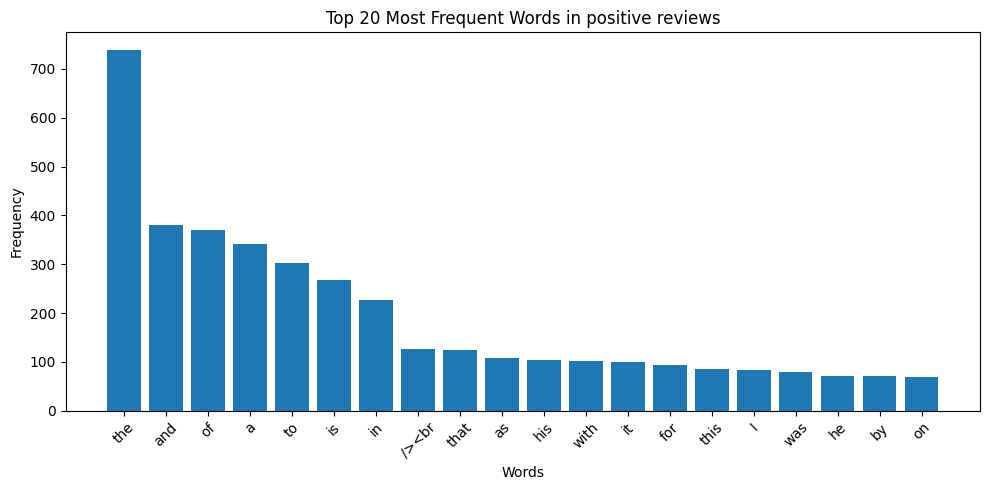

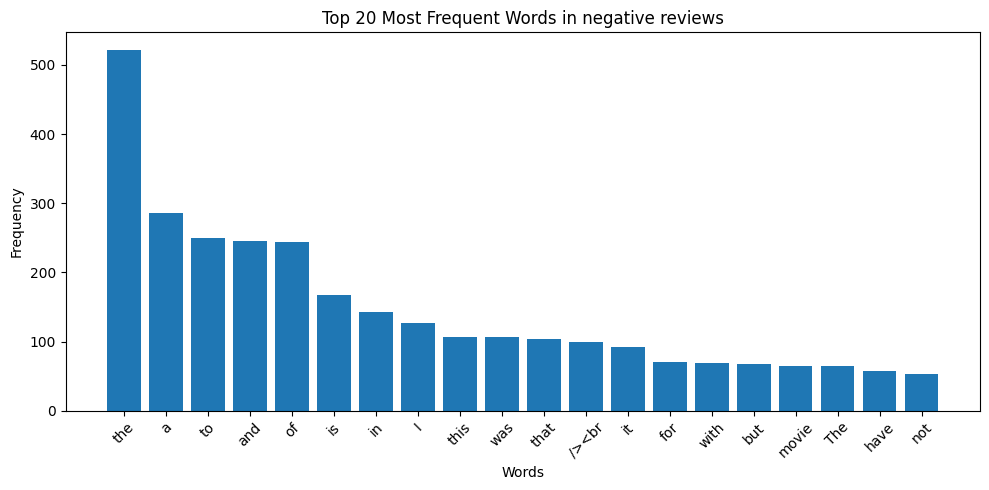

In [24]:
# [10.3] 
#Draw a bar plot to show the frequency of the two-20 most frequent words (the x-axis denotes words, 
# and the y-axis denotes their frequency), for positive and negative reviews, respectively [0.5 pt]
#

# Create bar plot for the frequency of the top 20 words
def plot_word_frequency(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_word_frequency(top_positive_words, 'Top 20 Most Frequent Words in positive reviews')
plot_word_frequency(top_negative_words, 'Top 20 Most Frequent Words in negative reviews')





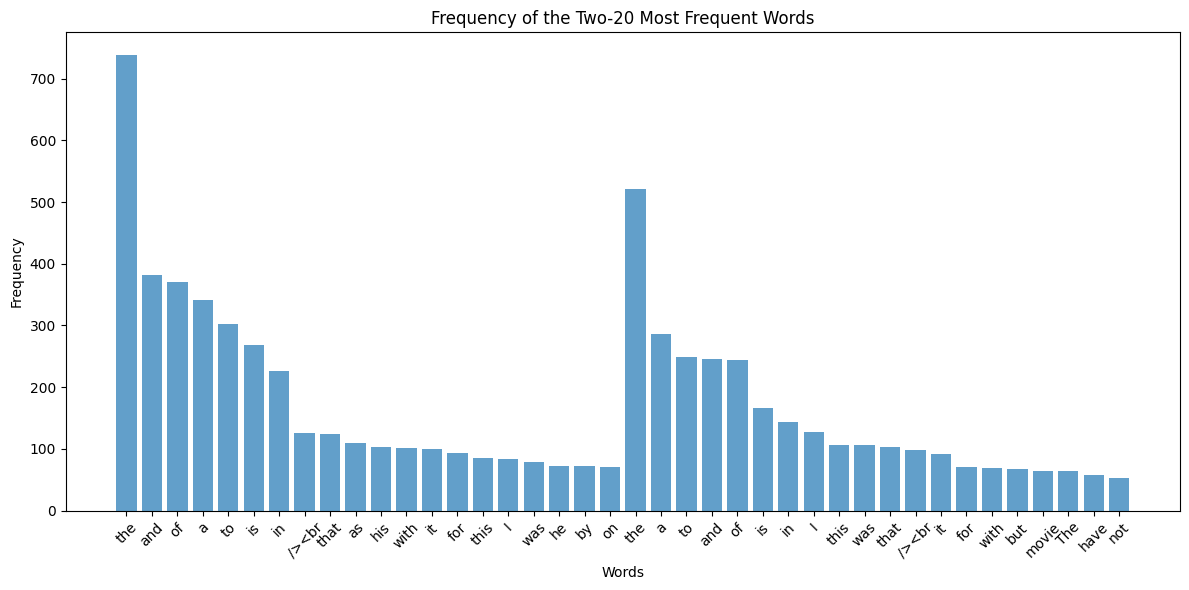

In [25]:
# [10.3] Combined visualization

# Calculate frequency of words in positive and negative reviews
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

positive_word_counts = Counter(" ".join(positive_reviews['movie review']).split())
negative_word_counts = Counter(" ".join(negative_reviews['movie review']).split())

# Get the top 20 most frequent words for positive and negative reviews
top_positive_words = positive_word_counts.most_common(20)
top_negative_words = negative_word_counts.most_common(20)

# Extract words and their frequencies
positive_words, positive_freq = zip(*top_positive_words)
negative_words, negative_freq = zip(*top_negative_words)

# Combine positive and negative words and frequencies
all_words = positive_words + negative_words
all_freq = positive_freq + negative_freq

# Generate positions for the bar plot
x_pos = np.arange(len(all_words))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x_pos, all_freq, align='center', alpha=0.7)
plt.xticks(x_pos, all_words, rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of the Two-20 Most Frequent Words')
plt.tight_layout()
plt.show()
